## Instacart Analysis - Visualisations - Products & Depts
1.	Import libraries, set directory paths & import data
2.	Check data frame dimensions, columns and datatypes
3.	Product Review
    -	Product price range distribution / Product price range contribution to revenue.
4.	Product and Departments
    -	Department contribution to revenue / Average spend per department
5.	Popular product
    -	Top 30 product / Bottom rated products (to be completed)
6.	Customer demographic vs Product Price Range
    -	Age / Family category / Income / Gender
7.	Product price range at quiet times

### import usual libraries plus visualisation tools

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import scipy

### set data set directory path

In [2]:
datasetpath = r'D:\My Documents\! Omnicompetent Ltd\Courses\Career Foundry - Data Analytics\Data Analytics Course\Instacart Basket Analysis\02 Data Sets'
datasetpath

'D:\\My Documents\\! Omnicompetent Ltd\\Courses\\Career Foundry - Data Analytics\\Data Analytics Course\\Instacart Basket Analysis\\02 Data Sets'

### set visualisation directory path

In [3]:
vizpath = r'D:\My Documents\! Omnicompetent Ltd\Courses\Career Foundry - Data Analytics\Data Analytics Course\Instacart Basket Analysis\04 Analysis'
vizpath

'D:\\My Documents\\! Omnicompetent Ltd\\Courses\\Career Foundry - Data Analytics\\Data Analytics Course\\Instacart Basket Analysis\\04 Analysis'

### import product and customer review dataset

In [4]:
df_review = pd.read_pickle(os.path.join(datasetpath,'testing_sample_prodcustkey.pkl'))

### review dimensions, columns & datatypes

In [5]:
df_review.shape

(9268148, 35)

In [6]:
df_review.dtypes

order_id                    int64
user_id                     int64
number_of_orders            int64
order_day_of_week           int64
order_hour_of_day           int64
days_since_prior_order    float64
product_id                  int64
reordered                   int64
product_name               object
department_id               int64
price                     float64
gender                     object
state                      object
age                         int64
n_dependants                int64
marital_status             object
income                      int64
region                     object
max_order                   int64
prod_price_range           object
sum_product_order           int64
top_order                 float64
product_revenue           float64
big_revenue               float64
key_dept                  float64
avg_order_days            float64
shop_freq                  object
avg_spend                 float64
spend_level                object
loyalty_flag  

## Product Review

### Price Range Distribution (same as number or orders placed)

In [11]:
no_of_products = df_review['product_name'].count()
no_of_products

9268148

In [12]:
per_prod_range = df_review.groupby(['prod_price_range']) ['product_name'].count()
per_prod_range

prod_price_range
High Range Product      1885671
Low Range Product       2833197
Medium Range Product    4549280
Name: product_name, dtype: int64

In [21]:
prod_range = per_prod_range.reindex(index = ['Low Range Product','Medium Range Product','High Range Product'])
prod_range

prod_price_range
Low Range Product       2833197
Medium Range Product    4549280
High Range Product      1885671
Name: product_name, dtype: int64

In [22]:
prod_count = prod_range.values
prod_count

array([2833197, 4549280, 1885671], dtype=int64)

In [19]:
prod_label = ['Low','Medium','High']
prod_label

['Low', 'Medium', 'High']

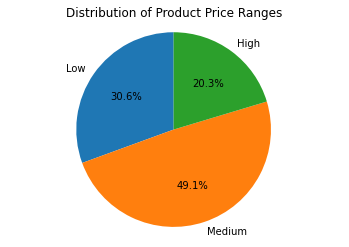

In [55]:
labels = prod_label
sizes = prod_count
texts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Product Price Ranges')
plt.savefig(os.path.join(vizpath,'30 Distribution of Product Price Ranges.png'))

### price range product contribution to revenue

In [44]:
# total revenue
df_review['price'].sum()

72183689.77999997

In [45]:
prod_range_rev = df_review.groupby(['prod_price_range']) ['price'].sum()
prod_range_rev.to_clipboard()

In [46]:
prod_range_rev = prod_range_rev.reindex(index = ['Low Range Product','Medium Range Product','High Range Product'])
prod_range_rev

prod_price_range
Low Range Product       8.439670e+06
Medium Range Product    3.756686e+07
High Range Product      2.617716e+07
Name: price, dtype: float64

In [47]:
prod_rev = prod_range_rev.values
prod_rev

array([ 8439669.87999755, 37566862.90006433, 26177157.00010348])

In [56]:
prod_label = ['$ Low','$ Medium','$ High']

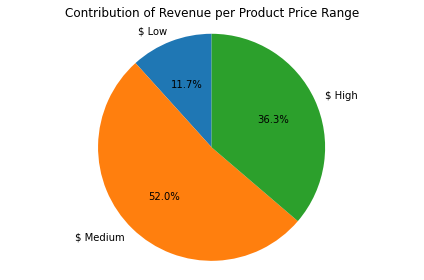

In [60]:
labels = prod_label
sizes = prod_rev
texts = plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Contribution of Revenue per Product Price Range')
plt.tight_layout()

plt.savefig(os.path.join(vizpath,'31 Contribution of Revenue per Product Price Range.png'))

## Product & Departments

### department contribution to revenue

In [42]:
# total revenue
total_rev = df_review['price'].sum()
total_rev

72183689.77999997

In [7]:
dept_rev = df_review.groupby(['department_id']) ['price'].sum()
dept_rev.to_clipboard()

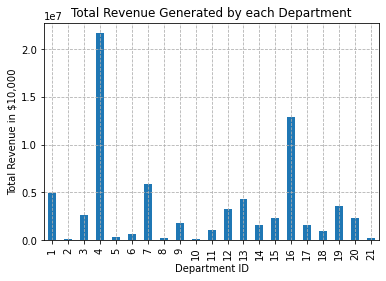

In [48]:
df_review.groupby(['department_id']) ['price'].sum().plot.bar()
plt.title('Total Revenue Generated by each Department')
plt.xlabel('Department ID')
plt.ylabel('Total Revenue in $10,000')
plt.grid(True, linestyle='--')

plt.savefig(os.path.join(vizpath,'33 Total Revenue Generated by each Department.png'))

### average spend per department

In [45]:
dept_rev_avg = df_review.groupby(['department_id']) ['price'].mean()
dept_rev_avg.to_clipboard()

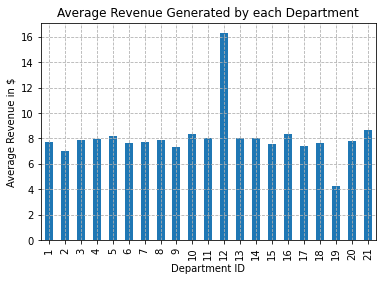

In [49]:
df_review.groupby(['department_id']) ['price'].mean().plot.bar('darkorange')
plt.title('Average Revenue Generated by each Department')
plt.xlabel('Department ID')
plt.ylabel('Average Revenue in $')
#plt.tight_layout()
plt.grid(True, linestyle='--')

plt.savefig(os.path.join(vizpath,'34 Average Revenue Generated by each Department.png'))

## Popular Products

#### create sub set of products previously flagged as most ordered and biggest contribution to revenue

In [58]:
df_pop_prod = df_review[(df_review['top_order']==1) & (df_review['big_revenue']==1)]
df_pop_prod.shape

(1378587, 35)

### count number of unique products

In [61]:
len(df_pop_prod['product_name'].unique())

48

In [77]:
df_pop_prod_counts = df_pop_prod['product_name'].value_counts()
df_pop_prod_counts

Banana                                         135820
Bag of Organic Bananas                         109297
Organic Strawberries                            77137
Organic Baby Spinach                            69552
Organic Hass Avocado                            62180
Organic Avocado                                 50436
Large Lemon                                     43517
Limes                                           40425
Organic Whole Milk                              39983
Organic Raspberries                             39973
Organic Garlic                                  31519
Organic Zucchini                                30012
Organic Blueberries                             28678
Cucumber Kirby                                  27830
Apple Honeycrisp Organic                        24733
Organic Grape Tomatoes                          24159
Organic Cucumber                                23214
Organic Baby Carrots                            22259
Organic Large Extra Fancy Fu

In [76]:
df_pop_prod_counts.to_clipboard()

### create subset for products with low number of orders... to be continued...

In [100]:
df_review['product_name'].value_counts()

Banana                                           135820
Bag of Organic Bananas                           109297
Organic Strawberries                              77137
Organic Baby Spinach                              69552
Organic Hass Avocado                              62180
                                                  ...  
Blue Cheese Stuffed Queen Olives                      1
Mango 100% Juice Blend                                1
Cameron's Handcrafted Coffee                          1
Brownie Mix 13 x 9 Family Size Dark Chocolate         1
Coastal Crush Red Central Coast                       1
Name: product_name, Length: 48163, dtype: int64

## Customer Demographics vs Product Price Range

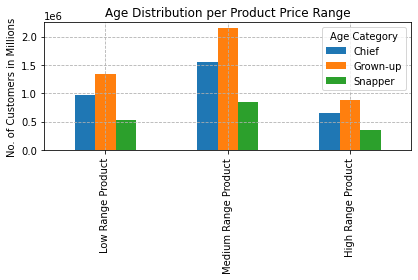

In [45]:
prod_age = df_review.groupby(['age_flag', 'prod_price_range']) ['prod_price_range'].count().unstack('age_flag')
prod_age = prod_age.reindex(index = ['Low Range Product','Medium Range Product','High Range Product'])
prod_age.plot.bar(stacked=False)

plt.title('Age Distribution per Product Price Range')
plt.xlabel('')
plt.ylabel('No. of Customers in Millions')
plt.legend(title='Age Category')
plt.grid(True, linestyle='--')
plt.tight_layout()

plt.savefig(os.path.join(vizpath,'38 Age Distribution per Product Price Range.png'))

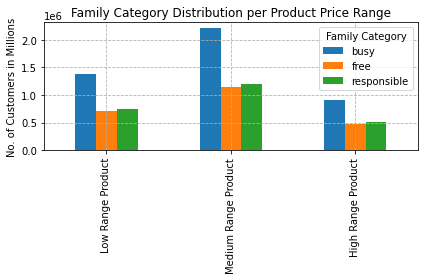

In [51]:
prod_family = df_review.groupby(['family_flag', 'prod_price_range']) ['prod_price_range'].count().unstack('family_flag')
prod_family = prod_family.reindex(index = ['Low Range Product','Medium Range Product','High Range Product'])
prod_family.plot.bar(stacked=False)

plt.title('Family Category Distribution per Product Price Range')
plt.xlabel('')
plt.ylabel('No. of Customers in Millions')
plt.legend(title='Family Category')
plt.grid(True, linestyle='--')
plt.tight_layout()

plt.savefig(os.path.join(vizpath,'39 Family Category Distribution per Product Price Range.png'))

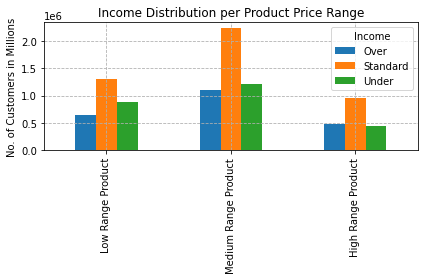

In [52]:
prod_income = df_review.groupby(['income_flag', 'prod_price_range']) ['prod_price_range'].count().unstack('income_flag')
prod_income = prod_income.reindex(index = ['Low Range Product','Medium Range Product','High Range Product'])
prod_income.plot.bar(stacked=False)

plt.title('Income Distribution per Product Price Range')
plt.xlabel('')
plt.ylabel('No. of Customers in Millions')
plt.legend(title='Income')
plt.grid(True, linestyle='--')
plt.tight_layout()

plt.savefig(os.path.join(vizpath,'40 Income Distribution per Product Price Range.png'))

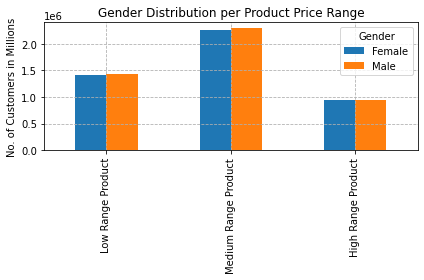

In [53]:
prod_gender = df_review.groupby(['gender', 'prod_price_range']) ['prod_price_range'].count().unstack('gender')
prod_gender = prod_gender.reindex(index = ['Low Range Product','Medium Range Product','High Range Product'])
prod_gender.plot.bar(stacked=False)

plt.title('Gender Distribution per Product Price Range')
plt.xlabel('')
plt.ylabel('No. of Customers in Millions')
plt.legend(title='Gender')
plt.grid(True, linestyle='--')
plt.tight_layout()

plt.savefig(os.path.join(vizpath,'41 Gender Distribution per Product Price Range.png'))

### product price range purchases during quiet times

In [33]:
quiettimes = [22,23,0,1,2,3,4,5,6,7,]

In [41]:
df_quiet_times = df_review.loc[df_review['order_hour_of_day'].isin(quiettimes)]

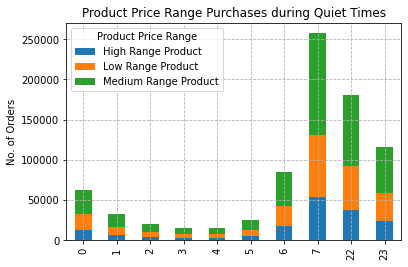

In [44]:
quiet_times = df_quiet_times.groupby(['prod_price_range', 'order_hour_of_day']) ['order_hour_of_day'].count().unstack('prod_price_range').fillna(0)
quiet_times.plot.bar(stacked=True)

plt.title('Product Price Range Purchases during Quiet Times')
plt.xlabel('')
plt.ylabel('No. of Orders')
plt.legend(title='Product Price Range')
plt.grid(True, linestyle='--')
plt.tight_layout()

plt.savefig(os.path.join(vizpath,'42 Product Price Range Purchases during Quiet Times.png'))